<a href="https://colab.research.google.com/github/won195/TIL/blob/master/3_3_%5B4_4_%EB%89%B4%EC%8A%A4_%ED%86%A0%ED%94%BD_%EB%B6%84%EB%A5%98_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D%5D_%EB%8D%B0%EC%9D%B4%EC%BD%98%EC%97%90_%EC%A0%9C%EC%B6%9C%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [38]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) #폰트설정

In [3]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [4]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn")

plt.rc("axes", unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<ipython-input-4-2630453d050b>:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
<ipython-input-4-2630453d050b>:31: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<Axes: title={'center': '한글'}>

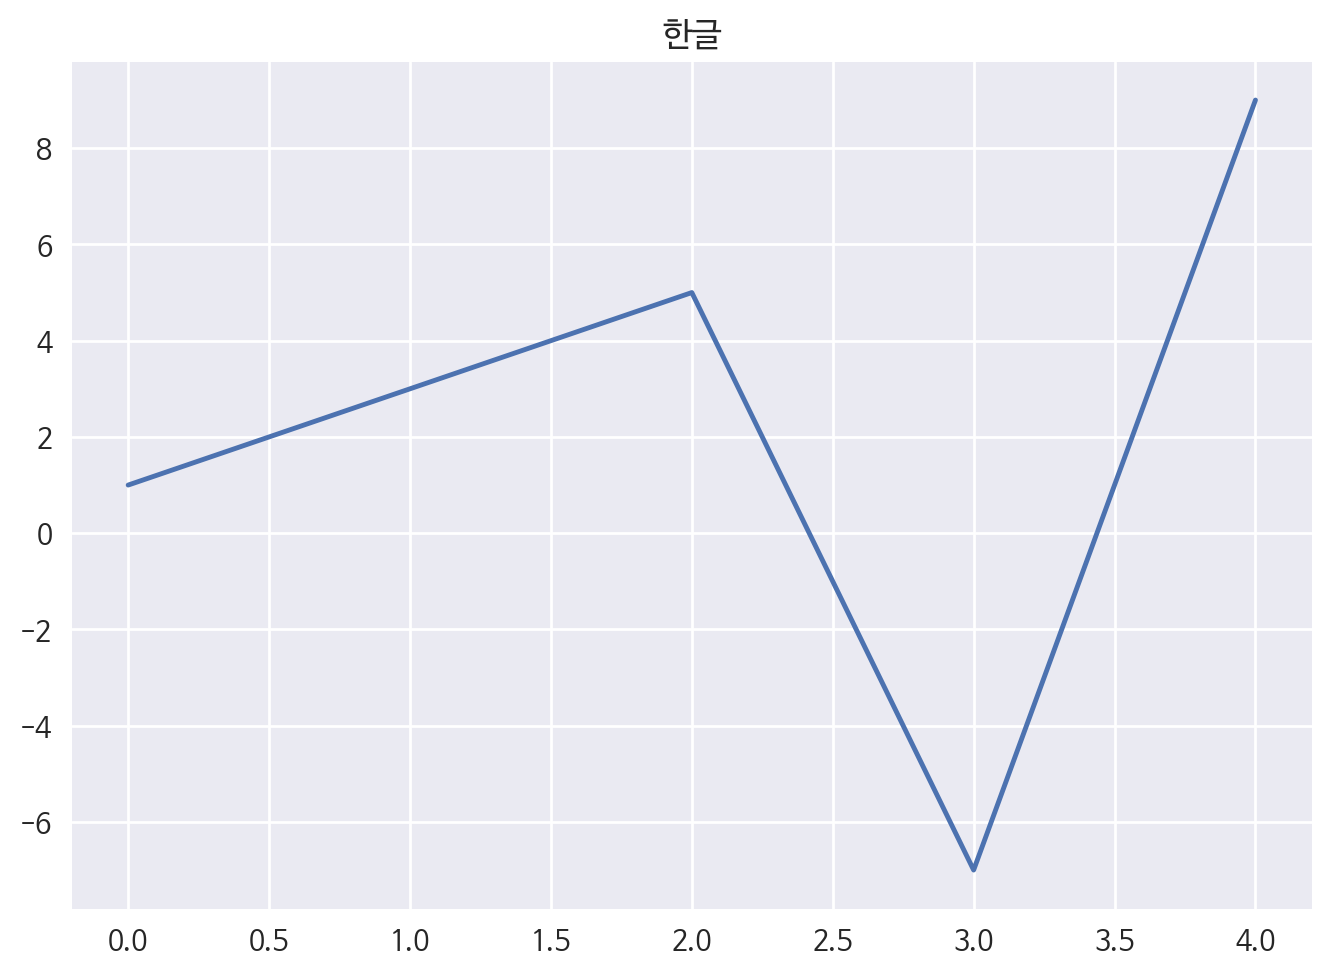

In [39]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [6]:
train = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/klue/train_data.csv")
test = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/klue/test_data.csv")
train.shape, test.shape

((45654, 3), (9131, 2))

In [7]:
topic = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/klue/topic_dict.csv")
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [8]:
train, test

(       index                               title  topic_idx
 0          0            인천→핀란드 항공기 결항…휴가철 여행객 분통          4
 1          1      실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4
 2          2      이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4
 3          3    NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합          4
 4          4           시진핑 트럼프에 중미 무역협상 조속 타결 희망          4
 ...      ...                                 ...        ...
 45649  45649        KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략          1
 45650  45650     1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토          2
 45651  45651         게시판 키움증권 2020 키움 영웅전 실전투자대회          1
 45652  45652                   답변하는 배기동 국립중앙박물관장          2
 45653  45653  2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후          2
 
 [45654 rows x 3 columns],
       index                            title
 0     45654       유튜브 내달 2일까지 크리에이터 지원 공간 운영
 1     45655          어버이날 맑다가 흐려져…남부지방 옅은 황사
 2     45656      내년부터 국가RD 평가 때 논문건수는 반영 않는다
 3     45657  김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
 4     45

In [9]:
df = pd.concat([train,test], axis=0)
train.shape, test.shape, df.shape

((45654, 3), (9131, 2), (54785, 3))

In [10]:
topic['topic']

0    IT과학
1      경제
2      사회
3    생활문화
4      세계
5     스포츠
6      정치
Name: topic, dtype: object

In [11]:
topic_count = df["topic_idx"].value_counts().sort_index()
topic_count.index = topic['topic']
topic_count

topic
IT과학    4824
경제      6222
사회      7362
생활문화    5933
세계      7629
스포츠     6933
정치      6751
Name: topic_idx, dtype: int64

<Axes: ylabel='topic'>

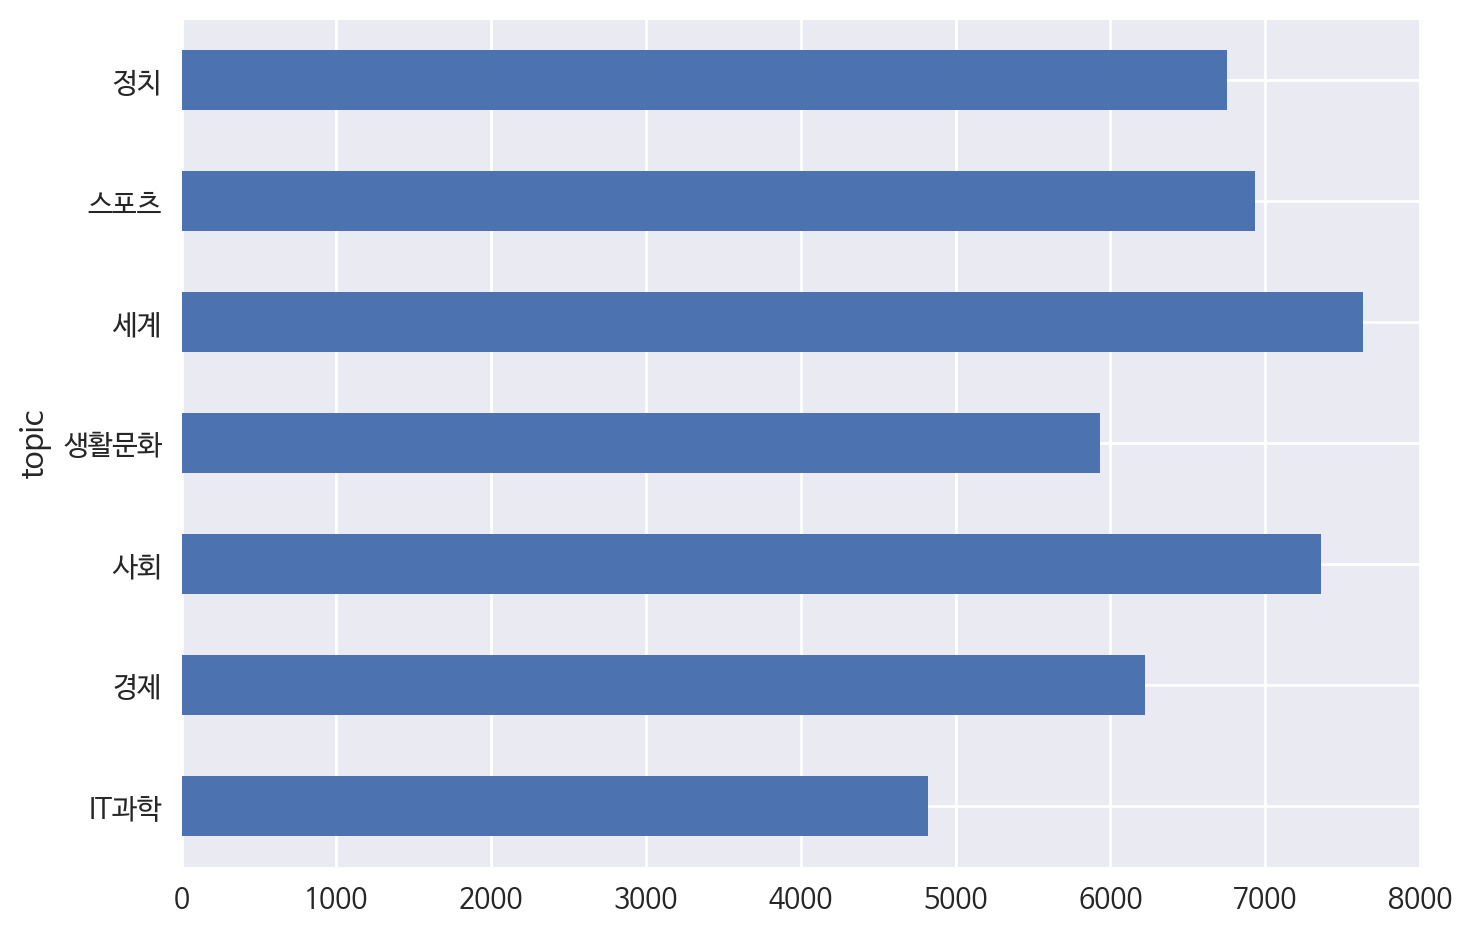

In [40]:
topic_count.plot.barh()

In [13]:
import re

def preprocessing(text):
  text = re.sub('\\\\n', ' ', text)
  text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]', ' ',text)
  text = re.sub('[\s]+', ' ', text)
  text = text.lower()
  return text

In [14]:
df['title'] = df['title'].map(preprocessing)
df["title"].head()

0            인천 핀란드 항공기 결항 휴가철 여행객 분통
1         실리콘밸리 넘어서겠다 구글 조원 들여 전역 거점화
2      이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3    nyt 클린턴 측근 기업 특수관계 조명 공과 사 맞물려종합
4           시진핑 트럼프에 중미 무역협상 조속 타결 희망
Name: title, dtype: object

In [15]:
def remove_stopwords(text):
  tokens = text.split(' ')
  stops = ['합니다','하는','할','하고','한다','그리고','입니다','그','등','이런','및','제','더']
  meaningful_words = [w for w in tokens if not w in stops]
  return ' '.join(meaningful_words)

In [16]:
df['title'] = df['title'].map(remove_stopwords)
df['title'].head()

0            인천 핀란드 항공기 결항 휴가철 여행객 분통
1         실리콘밸리 넘어서겠다 구글 조원 들여 전역 거점화
2      이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3    nyt 클린턴 측근 기업 특수관계 조명 공과 사 맞물려종합
4           시진핑 트럼프에 중미 무역협상 조속 타결 희망
Name: title, dtype: object

In [17]:
label_name = 'topic_idx'
label_name

'topic_idx'

In [18]:
df_train = df[df["topic_idx"].notnull()].copy()
df_test = df[df["topic_idx"].isnull()].copy()
df_train.shape, df_test.shape

((45654, 3), (9131, 3))

In [19]:
X_train_text = df_train["title"]
X_test_text = df_test["title"]
X_train_text.shape, X_test_text.shape

((45654,), (9131,))

In [20]:
y_train = df_train[label_name]
y_train.shape

(45654,)

In [21]:
y_test = df_test[label_name]
y_test.shape

(9131,)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer(ngram_range=(1,1),max_df=1.0, min_df=2)
tfidfvect.fit(X_train_text)

TfidfVectorizer(min_df=2)

In [41]:
X_train = tfidfvect.transform(X_train_text)
X_test = tfidfvect.transform(X_test_text)
X_train.shape, X_test.shape

((45654, 27314), (9131, 27314))

In [42]:
# tfidfvect.vocabulary_
feature_names = tfidfvect.get_feature_names_out()
len(feature_names)

27314

In [43]:
df_vocab = pd.DataFrame(X_train.toarray(), columns=feature_names)
df_vocab = df_vocab.sum().to_frame()
df_vocab

,0
aa,1.062553
aa로,0.984721
abs,1.592133
ab운용,0.972684
ac,1.432793
...,...
힘을,0.870914
힘이,1.555737
힘입어,2.042702
힘찬,2.533876


In [44]:
df_vocab_top = df_vocab[0].nlargest(50)
df_vocab_top

대통령    347.042849
신간     258.192677
억원     248.103273
게시판    229.108308
출시     207.983761
분기     177.066217
kt     167.871350
이란     164.742991
감독     163.620994
개최     153.081852
트럼프    151.850445
한국     150.744945
개발     135.781708
만에     131.233117
그래픽    128.016230
작년     125.376293
경기     121.351764
올해     120.462835
정부     119.870465
코로나    118.110907
삼성     113.260259
김정은    112.545961
월드컵    112.293390
공개     111.974698
서울     110.655308
lg     110.154821
코스피    107.390881
영업익    103.758699
개막     102.215817
시즌     101.537165
류현진    100.090209
최대     100.037840
지원     100.016714
중국      98.980714
연속      97.933260
네이버     97.908155
국내      97.519997
연승      96.718616
사망      92.495336
미국      91.204134
서비스     91.191077
추진      90.170632
증가      89.514664
내년      89.382372
skt     88.141987
전국      87.396746
세계      86.931613
꺾고      85.979718
최고      85.377464
터키      83.974892
Name: 0, dtype: float64

<Axes: >

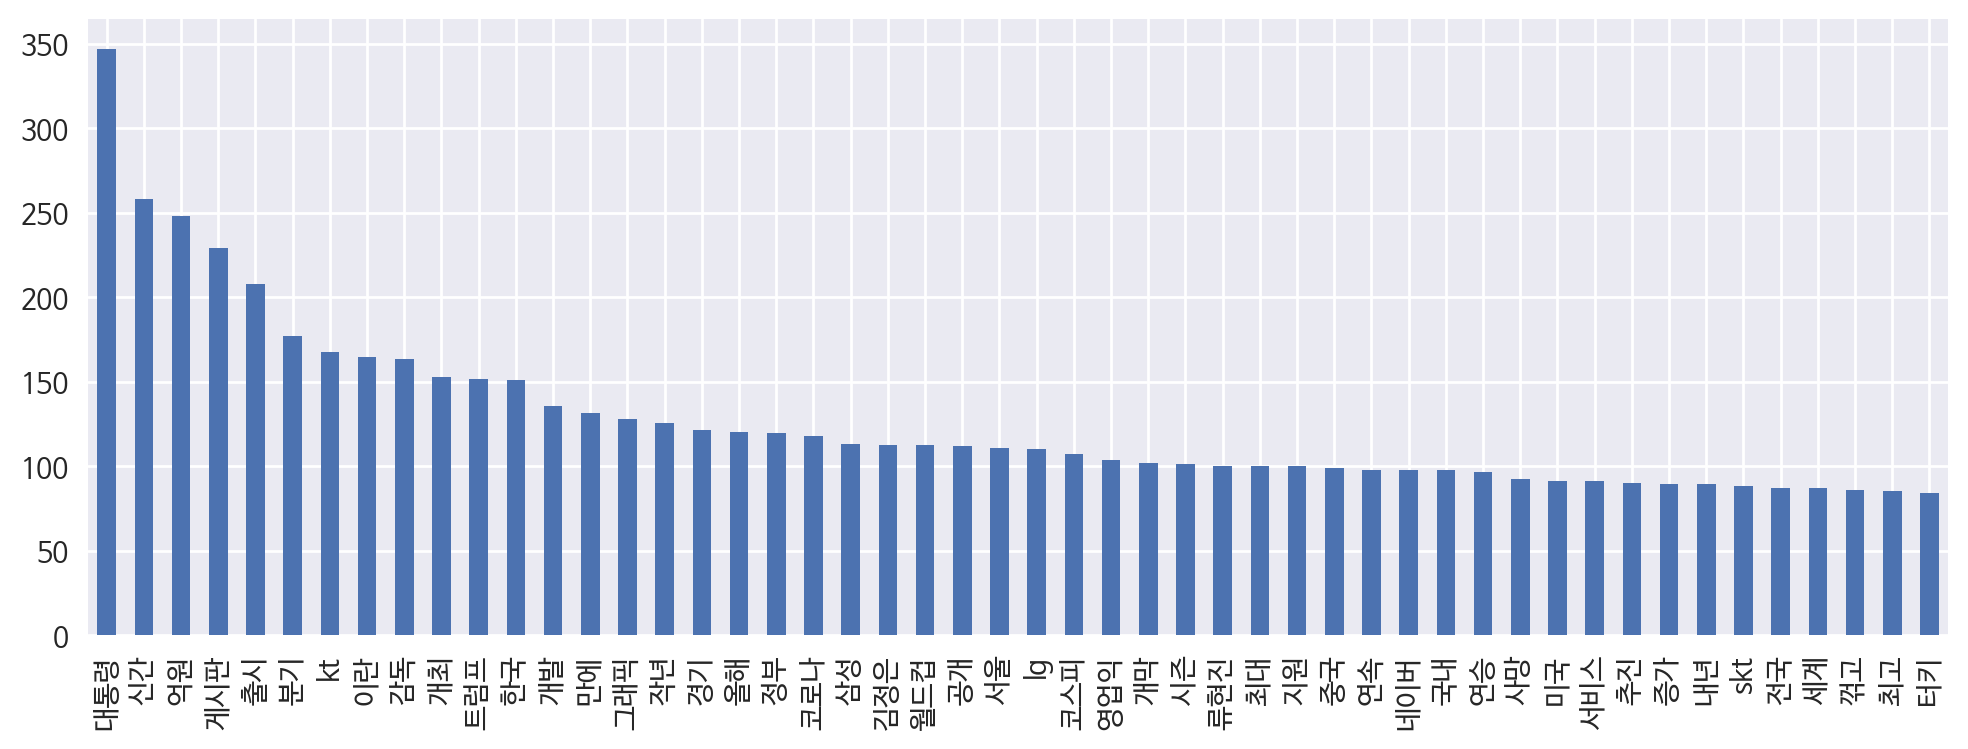

In [45]:
df_vocab_top.plot.bar(figsize=(12, 4))

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
                               n_jobs=-1,
                               random_state=42,)
model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=3)
y_valid_predict

array([2., 1., 4., ..., 2., 2., 2.])

In [48]:
y_valid_predict[:10]

array([2., 1., 4., 4., 4., 4., 4., 4., 6., 4.])

In [49]:
valid_accuracy = (y_train == y_valid_predict)
valid_accuracy.mean()

0.73868664301047

In [50]:
df_accuracy = pd.DataFrame({"train": y_train,
                            "predict":y_valid_predict,
                            "accuracy": y_train == y_valid_predict})
df_accuracy

,train,predict,accuracy
0,4.0,2.0,False
1,4.0,1.0,False
2,4.0,4.0,True
3,4.0,4.0,True
4,4.0,4.0,True
...,...,...,...
45649,1.0,4.0,False
45650,2.0,2.0,True
45651,1.0,2.0,False
45652,2.0,2.0,True


In [51]:
topic['topic']

0    IT과학
1      경제
2      사회
3    생활문화
4      세계
5     스포츠
6      정치
Name: topic, dtype: object

In [52]:
df_group_accuracy = df_accuracy.groupby("train")["accuracy"].mean()
df_group_accuracy.index = topic['topic']
df_group_accuracy

topic
IT과학    0.747305
경제      0.657827
사회      0.633659
생활문화    0.779538
세계      0.717656
스포츠     0.869465
정치      0.775144
Name: accuracy, dtype: float64

In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [54]:
y_predict = model.predict(X_test)
y_predict[:10]

array([2., 3., 2., 2., 3., 2., 5., 3., 4., 4.])

In [55]:
submit = pd.read_csv("/content/drive/MyDrive/오늘코드todaycode/data/klue/sample_submission.csv")
submit.head()

,index,topic_idx
0,45654,0
1,45655,0
2,45656,0
3,45657,0
4,45658,0


In [56]:
submit["topic_idx"] = y_predict.astype(int)
submit

,index,topic_idx
0,45654,2
1,45655,3
2,45656,2
3,45657,2
4,45658,3
...,...,...
9126,54780,3
9127,54781,2
9128,54782,4
9129,54783,2


In [57]:
valid_accuracy = valid_accuracy.mean()

In [58]:
file_name = f"/content/drive/MyDrive/오늘코드todaycode/data/klue/submit_{valid_accuracy}.csv"
file_name

'/content/drive/MyDrive/오늘코드todaycode/data/klue/submit_0.73868664301047.csv'

In [63]:
submit.to_csv(file_name, index=False)

In [64]:
pd.read_csv(file_name)

,index,topic_idx
0,45654,2
1,45655,3
2,45656,2
3,45657,2
4,45658,3
...,...,...
9126,54780,3
9127,54781,2
9128,54782,4
9129,54783,2
